<a href="https://colab.research.google.com/github/gomunamu/pdp/blob/main/bostonhousing_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = (boston_housing.load_data())

57026/57026 [==============================] - 0s 0us/step


In [2]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [7]:
from tensorflow import keras
from keras import layers
def build_model():
  model = keras.Sequential([
      layers.Dense(64, activation="relu"),
      layers.Dense(64, activation="relu"),
      layers.Dense(1)
  ])
  model.compile(optimizer="rmsprop", loss="mae", metrics=["mae"])
  return model

In [8]:
import numpy as np
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
  print(f"Processing fold#{i}")
  val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
  partial_train_data = np.concatenate(
   [train_data[:i * num_val_samples],
    train_data[(i+1) * num_val_samples:]],axis=0
  )
  partial_train_targets = np.concatenate(
   [train_targets[:i * num_val_samples],
    train_targets[(i+1) * num_val_samples:]],axis=0
  )
  model = build_model()
  model.fit(partial_train_data, partial_train_targets,
            epochs=num_epochs, batch_size=16, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)


Processing fold#0
Processing fold#1
Processing fold#2
Processing fold#3


In [9]:
print(all_scores)
print(np.mean(all_scores))

[1.9897631406784058, 2.415071964263916, 2.409250020980835, 2.4920361042022705]
2.326530307531357


In [14]:
num_epochs = 500
all_mae_histories = []

for i in range(k):
  print(f"Processing fold#{i}")
  val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
  partial_train_data = np.concatenate(
   [train_data[:i * num_val_samples],
    train_data[(i+1) * num_val_samples:]],axis=0
  )
  partial_train_targets = np.concatenate(
   [train_targets[:i * num_val_samples],
    train_targets[(i+1) * num_val_samples:]],axis=0
  )
  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets,
                      validation_data=(val_data, val_targets),
                      epochs=num_epochs, batch_size=16, verbose=0)
  mae_history = history.history["val_mae"]
  all_mae_histories.append(mae_history)

Processing fold#0
dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
Processing fold#1
dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
Processing fold#2
dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
Processing fold#3
dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


In [18]:

avg_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

[[18.2662410736084, 14.47207260131836, 10.184535026550293, 7.253110408782959, 5.709016799926758, 4.587991237640381, 3.793447971343994, 3.3000118732452393, 2.993521213531494, 2.789825677871704, 2.68697190284729, 2.744213342666626, 2.6801178455352783, 2.6397805213928223, 2.6183743476867676, 2.5843045711517334, 2.5454277992248535, 2.5222737789154053, 2.4762401580810547, 2.478022575378418, 2.4584720134735107, 2.404958963394165, 2.382281541824341, 2.3559868335723877, 2.239691734313965, 2.37048077583313, 2.2490108013153076, 2.2553207874298096, 2.2047924995422363, 2.2015490531921387, 2.1006925106048584, 2.275735378265381, 2.108060121536255, 2.1309168338775635, 2.1657068729400635, 2.1457440853118896, 2.10725998878479, 2.101142406463623, 2.1450130939483643, 2.0550525188446045, 2.090519905090332, 2.0658888816833496, 2.1037096977233887, 2.2553274631500244, 2.2101306915283203, 2.1178138256073, 2.097012758255005, 2.0617284774780273, 2.028212547302246, 2.086728572845459, 2.032291889190674, 1.9951877

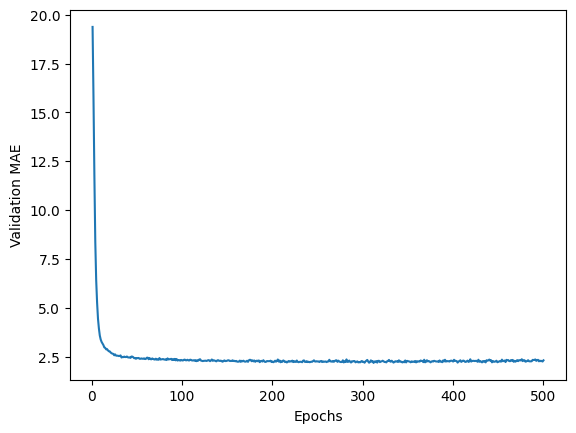

In [21]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(avg_mae_history)+1), avg_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

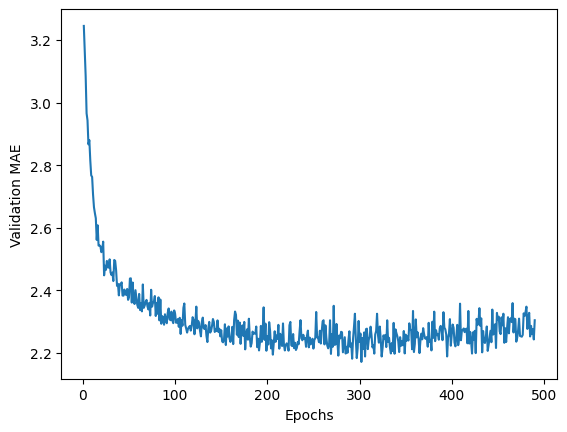

In [22]:
truncated_mae_history = avg_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history)+1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()